In [15]:
from matplotlib import pyplot as plt
import pickle
import numpy as np

In [16]:
results_dir = "/home/mocap/visual_servo_ws/src/vs_experiment/results/exp_004_2023-08-14-17-00-55"
file = results_dir + "/history.pkl"
with open(file, 'rb') as handle:
    history = pickle.load(handle)

In [25]:
print(history.keys())
time = np.array(history["time"])
time = time - time[0]
solve_time = np.array(history["solve_time"])
joint_vel_command = np.array(history["joint_vel_command"])
error_position = np.array(history["error_position"])
error_axis_angle = np.array(history["error_axis_angle"])


dict_keys(['time', 'q', 'dq', 'corners', 'corner_depths', 'obstacle_corner_in_world', 'obstacle_corner_in_image', 'error_position', 'error_axis_angle', 'cbf', 'joint_vel_command', 'info', 'd_hat', 'solve_time'])


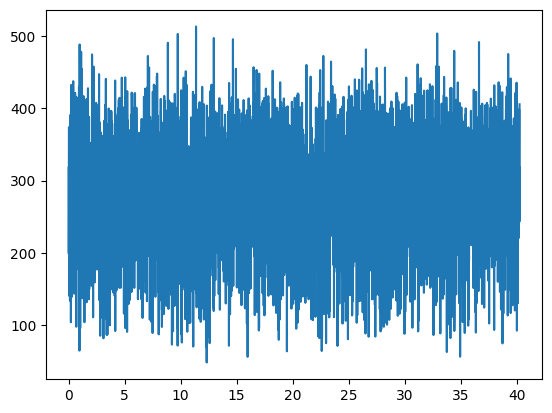

In [22]:
plt.plot(time-time[0], 1/solve_time)

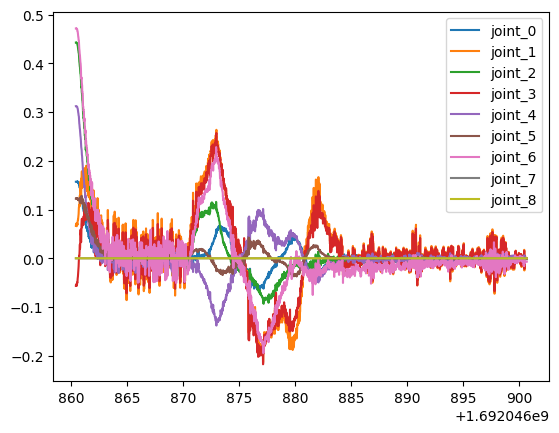

In [23]:
for i in range(joint_vel_command.shape[1]):
    plt.plot(time, joint_vel_command[:,i], label="joint_{}".format(i))
plt.legend()
plt.show()

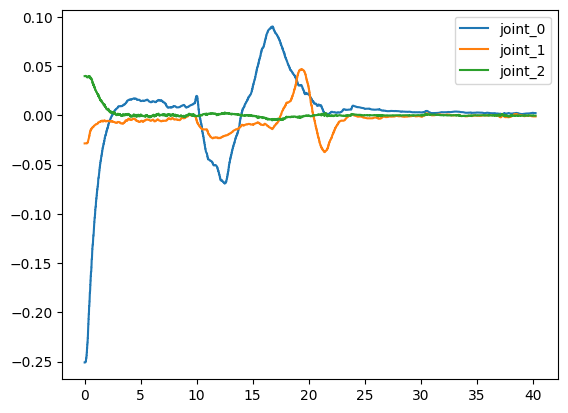

In [26]:
for i in range(error_position.shape[1]):
    plt.plot(time, error_position[:,i], label="joint_{}".format(i))
plt.legend()
plt.show()

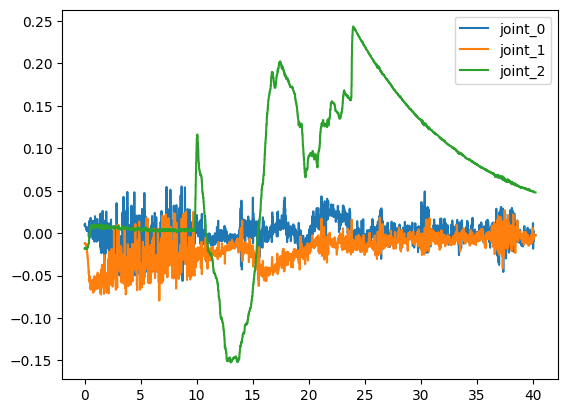

In [27]:
for i in range(error_axis_angle.shape[1]):
    plt.plot(time, error_axis_angle[:,i], label="joint_{}".format(i))
plt.legend()
plt.show()